In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, RandomFlip, RandomRotation, Resizing, Rescaling, BatchNormalization
from keras.applications import VGG16
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/uc_merced_land_use'


In [ ]:
BATCH_SIZE = 56
IMG_W = 256
IMG_H = 256
EPOCH = 12
CHANNEL = 3

INPUT_SHAPE = [BATCH_SIZE, IMG_W, IMG_H, CHANNEL]


In [ ]:
train_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/train')
val_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/validation')
test_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/test')


Found 7360 files belonging to 21 classes.
Found 2107 files belonging to 21 classes.
Found 1050 files belonging to 21 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_W, IMG_H, CHANNEL))

base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(21, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=EPOCH, batch_size=BATCH_SIZE)


Epoch 1/12
230/230 [==============================] - 325s 1s/step - loss: 7.5771 - accuracy: 0.6485 - val_loss: 0.7736 - val_accuracy: 0.8064
Epoch 2/12
230/230 [==============================] - 257s 1s/step - loss: 1.0763 - accuracy: 0.8062 - val_loss: 0.7457 - val_accuracy: 0.8211
Epoch 3/12
230/230 [==============================] - 255s 1s/step - loss: 0.8934 - accuracy: 0.8318 - val_loss: 0.8174 - val_accuracy: 0.8325
Epoch 4/12
230/230 [==============================] - 254s 1s/step - loss: 1.0404 - accuracy: 0.8508 - val_loss: 0.9598 - val_accuracy: 0.8320
Epoch 5/12
230/230 [==============================] - 255s 1s/step - loss: 1.1892 - accuracy: 0.8524 - val_loss: 1.4508 - val_accuracy: 0.8225
Epoch 6/12
230/230 [==============================] - 255s 1s/step - loss: 1.2007 - accuracy: 0.8590 - val_loss: 0.8678 - val_accuracy: 0.8605
Epoch 7/12
230/230 [==============================] - 257s 1s/step - loss: 1.1768 - accuracy: 0.8798 - val_loss: 1.5617 - val_accuracy: 0.8306

In [ ]:
test_loss, test_acc = model.evaluate(test_data)

print(f"Test Accuracy: {test_acc}")


33/33 [==============================] - 27s 744ms/step - loss: 1.9939 - accuracy: 0.8505
Test Accuracy: 0.8504762053489685


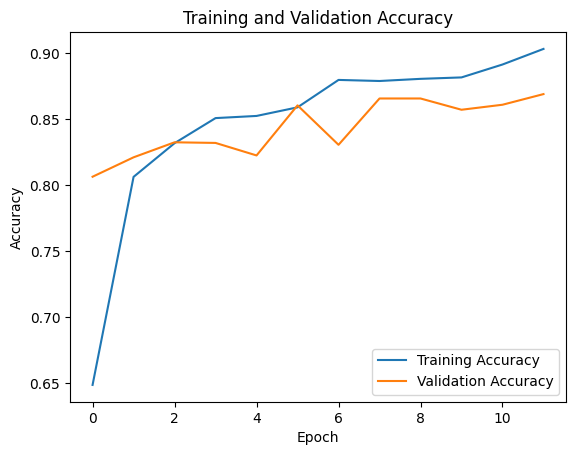

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


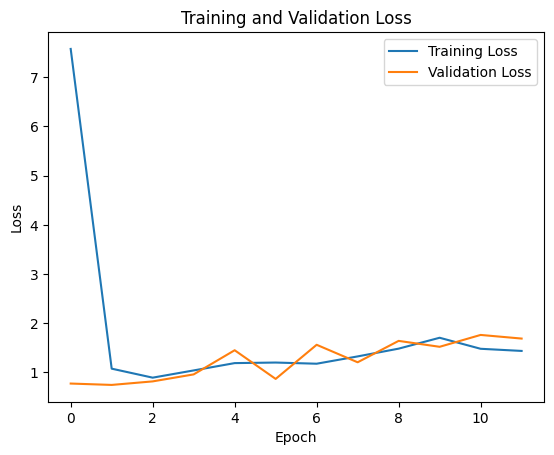

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

true_labels = []
all_pred_classes = []

for images, labels in test_data:
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1)

    true_labels.extend(labels.numpy())
    all_pred_classes.extend(pred_classes)

1/1 [==============================] - 1s 822ms/step


In [ ]:
classes = train_data.class_names
n_classes = len(classes)
classes
#n_classes

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

In [ ]:
report = classification_report(true_labels, all_pred_classes, target_names = classes)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     agricultural       1.00      0.98      0.99        50
         airplane       0.94      0.88      0.91        50
  baseballdiamond       0.90      0.90      0.90        50
            beach       0.79      0.98      0.88        50
        buildings       0.72      0.62      0.67        50
        chaparral       1.00      1.00      1.00        50
 denseresidential       0.57      0.46      0.51        50
           forest       0.91      1.00      0.95        50
          freeway       0.90      0.90      0.90        50
       golfcourse       0.85      0.90      0.87        50
           harbor       0.96      1.00      0.98        50
     intersection       0.69      0.96      0.80        50
mediumresidential       0.67      0.78      0.72        50
   mobilehomepark       0.91      0.60      0.72        50
         overpass       0.84      0.92      0.88        50
       parkinglot       1.00    

In [ ]:
def decode_labels(labels):
     return np.argmax(labels, axis = 1)


1/1 [==============================] - 1s 818ms/step


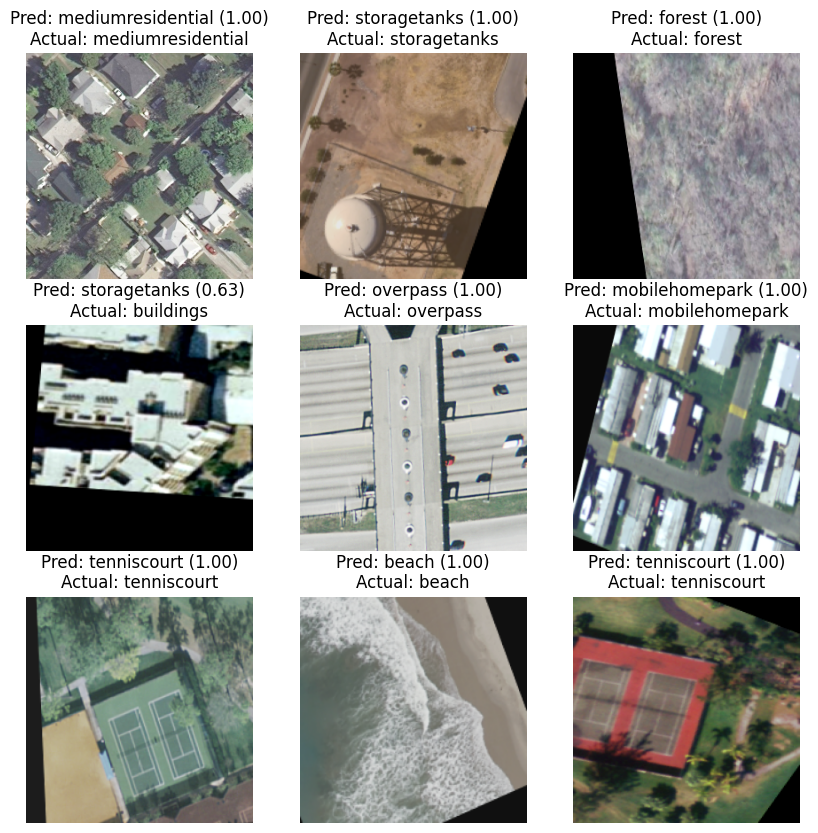

In [ ]:
for images, labels in test_data.take(1):
    predictions = model.predict(images)
    pred_classes = decode_labels(predictions)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class = classes[pred_classes[i]]
        true_class = classes[labels[i].numpy()]
        prob = np.max(predictions[i])

        plt.title(f"Pred: {pred_class} ({prob:.2f})\nActual: {true_class}")
        plt.axis("off")
    plt.show()


In [ ]:
tf.saved_model.save(model, "VGGNet_Model")

In [ ]:
import pickle

saved_model = pickle.dumps(model)

In [ ]:
from tensorflow.keras.models import save_model

model.save('my_model.h5')

from google.colab import files
files.download('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>